In [2]:
import numpy as np
import random as rd
from tqdm import tqdm

In [9]:
error_report=[]
class Neuron():
    def __init__(self):
        np.random.seed(0)
        #Initializing random weights for the neuron 
        self.weights= 2* np.random.random((3,1)) -1
    
    def sig(self, x):
        # sigmoid activation function
        return 1/ (1+ np.exp(-x))
    
    def sig_der(self, x):
        # sigmoid derivation
        return x*(1+x)
    
    def predict(self, x):
        return self.sig(np.dot(x,self.weights))
    
    def fit(self, x, y, epochs, lr= 0.1):
      # training the neuron and adjusting the weight
      for i in range(1, 11):
        for _ in tqdm(range(epochs//10), ascii=True, desc='Epochs {}'.format(i*100)):
          output= self.predict(x)
          error= output-y
          error_report.append(np.mean(error))
          adjust= np.dot(x.T, error*self.sig_der(output))
          self.weights= self.weights-(lr*adjust)
        print('Loss at Epoch {}:'.format(i*100), error_report[-1])

In [10]:
neuron= Neuron()
print('\nThe weight before training are:')
print(neuron.weights)
train_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]]) 
train_outputs = np.array([[0, 1, 1, 0]]).T
neuron.fit(train_inputs, train_outputs, 1000, lr= 0.05)
print('\nThe weight after training are:')
print(neuron.weights)

print('\nThe predicted output of [1,0,0] is:')
print(neuron.predict(np.array([1,0,0])))

Epochs 1000: 100%|##########| 100/100 [00:00<00:00, 14486.10it/s]


The weight before training are:
[[0.09762701]
 [0.43037873]
 [0.20552675]]
Loss at Epoch 100: 0.14626257563223471
Loss at Epoch 200: 0.12471397188576853
Loss at Epoch 300: 0.10843520027903275
Loss at Epoch 400: 0.09693280673745741
Loss at Epoch 500: 0.08839118950780976
Loss at Epoch 600: 0.08175779723502738
Loss at Epoch 700: 0.07642404548031527
Loss at Epoch 800: 0.07201815684812299
Loss at Epoch 900: 0.06830048783593692
Loss at Epoch 1000: 0.06510934149549567

The weight after training are:
[[ 6.62453261]
 [-0.20268395]
 [-1.73080302]]

The predicted output of [1,0,0] is:
[0.99867436]


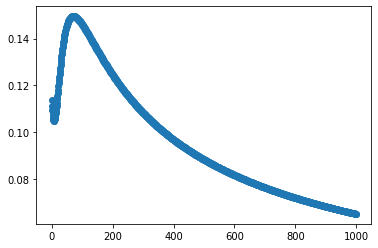

In [11]:
import matplotlib.pyplot as plt

epochs= range(1000)
plt.figure()
plt.scatter(epochs,error_report)
plt.show()